# Indexing: Text Embedding with OpenAI

In [1]:
# Run the line of code below to check the version of langchain in the current environment.
# Substitute "langchain" with any other package name to check their version.

In [2]:
pip show langchain

Name: langchain
Version: 0.3.19
Summary: Building applications with LLMs through composability
Home-page: 
Author: 
Author-email: 
License: MIT
Location: c:\users\hp\anaconda3\envs\longchain_env\lib\site-packages
Requires: aiohttp, async-timeout, langchain-core, langchain-text-splitters, langsmith, numpy, pydantic, PyYAML, requests, SQLAlchemy, tenacity
Required-by: langchain-community
Note: you may need to restart the kernel to use updated packages.


In [3]:
%load_ext dotenv
%dotenv

In [4]:
from langchain_community.document_loaders import Docx2txtLoader
from langchain_text_splitters.markdown import MarkdownHeaderTextSplitter
from langchain_text_splitters.character import CharacterTextSplitter
from langchain_openai.embeddings import OpenAIEmbeddings
import numpy as np

In [5]:
loader_docx = Docx2txtLoader("Introduction_to_Data_and_Data_Science_2.docx")
pages = loader_docx.load()

md_splitter = MarkdownHeaderTextSplitter(
    headers_to_split_on = [("#", "Course Title"), 
                           ("##", "Lecture Title")]
)

pages_md_split = md_splitter.split_text(pages[0].page_content)

for i in range(len(pages_md_split)):
    pages_md_split[i].page_content = ' '.join(pages_md_split[i].page_content.split())
    
char_splitter = CharacterTextSplitter(
    separator = ".",
    chunk_size = 500,
    chunk_overlap  = 50
)

pages_char_split = char_splitter.split_documents(pages_md_split)

In [6]:
pages_char_split

[Document(metadata={'Course Title': 'Introduction to Data and Data Science', 'Lecture Title': 'Analysis vs Analytics'}, page_content='Alright! So… Let’s discuss the not-so-obvious differences between the terms analysis and analytics. Due to the similarity of the words, some people believe they share the same meaning, and thus use them interchangeably. Technically, this isn’t correct. There is, in fact, a distinct difference between the two. And the reason for one often being used instead of the other is the lack of a transparent understanding of both. So, let’s clear this up, shall we? First, we will start with analysis'),
 Document(metadata={'Course Title': 'Introduction to Data and Data Science', 'Lecture Title': 'Analysis vs Analytics'}, page_content='Consider the following… You have a huge dataset containing data of various types. Instead of tackling the entire dataset and running the risk of becoming overwhelmed, you separate it into easier to digest chunks and study them individu

In [7]:
embedding = OpenAIEmbeddings(model = "text-embedding-ada-002")

In [8]:
pages_char_split[18]

Document(metadata={'Course Title': 'Introduction to Data and Data Science', 'Lecture Title': 'Programming Languages & Software Employed in Data Science - All the Tools You Need'}, page_content='More importantly, it will be sufficient for your need to create quick and accurate analyses. However, if your theoretical preparation is strong enough, you will find yourself restricted by software. Knowing a programming language such as R and Python, gives you the freedom to create specific, ad-hoc tools for each project you are working on')

In [9]:
vector1 = embedding.embed_query(pages_char_split[3].page_content)
vector2 = embedding.embed_query(pages_char_split[5].page_content)
vector3 = embedding.embed_query(pages_char_split[18].page_content)

In [10]:
len(vector1), len(vector2), len(vector3)

(1536, 1536, 1536)

In [11]:
np.dot(vector1, vector2), np.dot(vector1, vector3), np.dot(vector2, vector3)

(0.8791284497943928, 0.8000235828747095, 0.7934993700101874)

In [12]:
np.linalg.norm(vector1), np.linalg.norm(vector2), np.linalg.norm(vector3)

(0.999999951896922, 0.9999999432048748, 0.9999999688261214)

# Indexing: Creating a Chroma Vectorstore

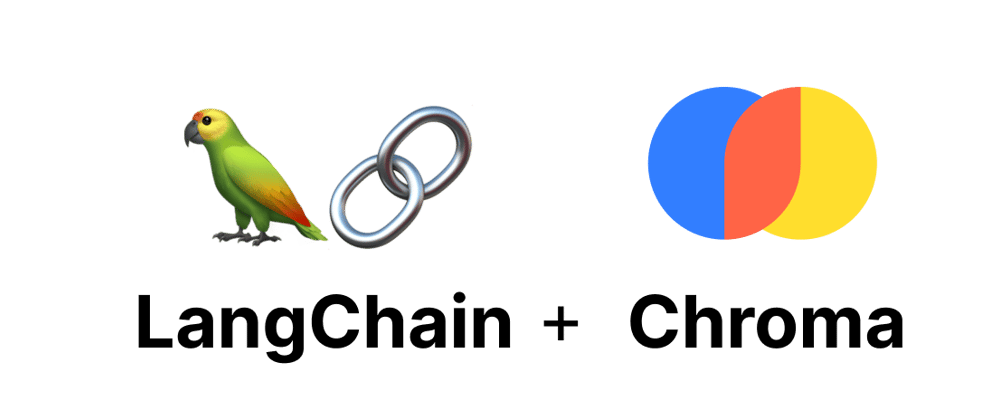

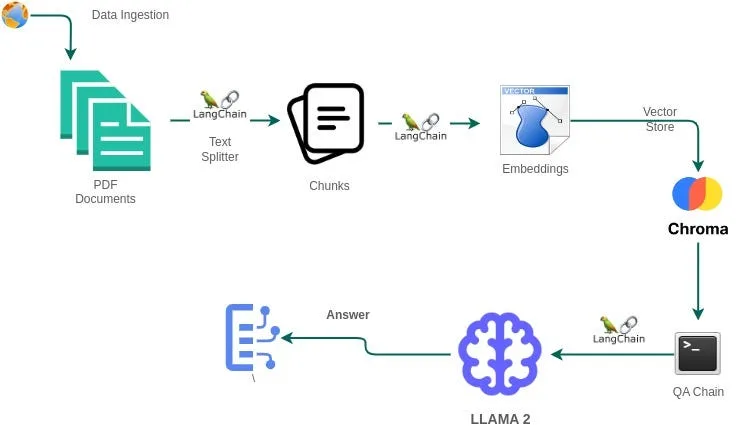

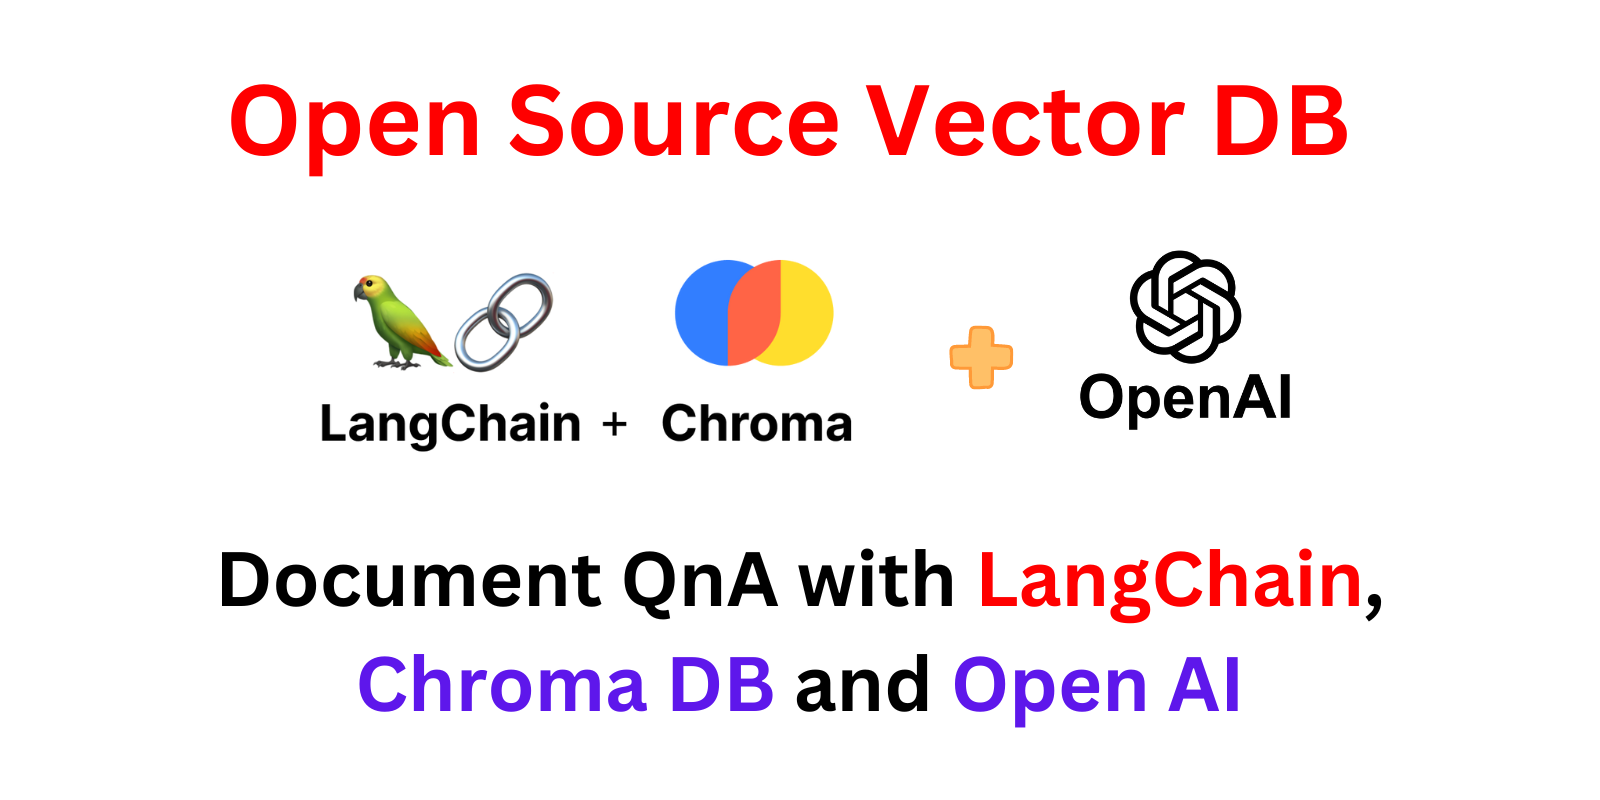

* In this section, I will explore how to implement RAG in LangChain, a useful framework for simplifying the development process of applications using LLMs, and integrate it with Chroma to create a vector database. 

* ChromaDB is used as the vector database for storing the embedded representations of the data, ensuring efficient data retrieval.

In [13]:
from langchain_community.document_loaders import Docx2txtLoader
from langchain_text_splitters.markdown import MarkdownHeaderTextSplitter
from langchain_text_splitters.character import CharacterTextSplitter
from langchain_openai.embeddings import OpenAIEmbeddings
from langchain_community.vectorstores import Chroma

In [14]:
loader_docx = Docx2txtLoader("Introduction_to_Data_and_Data_Science_2.docx")
pages = loader_docx.load()

md_splitter = MarkdownHeaderTextSplitter(
    headers_to_split_on = [("#", "Course Title"), 
                           ("##", "Lecture Title")]
)



In [15]:
pages_md_split = md_splitter.split_text(pages[0].page_content)



In [16]:
for i in range(len(pages_md_split)):
    pages_md_split[i].page_content = ' '.join(pages_md_split[i].page_content.split())
    


In [17]:
char_splitter = CharacterTextSplitter(
    separator = ".",
    chunk_size = 500,
    chunk_overlap  = 50
)



In [18]:
pages_char_split = char_splitter.split_documents(pages_md_split)

embedding = OpenAIEmbeddings(model='text-embedding-ada-002')

In [19]:
len(pages_char_split)

20

In [20]:
pip install chromadb

Note: you may need to restart the kernel to use updated packages.


In [21]:
vectorstore = Chroma.from_documents(documents = pages_char_split, 
                                    embedding = embedding, 
                                    persist_directory = "./intro-to-ds-lectures")

In [22]:
vectorstore_from_directory = Chroma(persist_directory = "./intro-to-ds-lectures", 
                                    embedding_function = embedding)

C:\Users\HP\AppData\Local\Temp\ipykernel_19140\4065001910.py:1: LangChainDeprecationWarning: The class `Chroma` was deprecated in LangChain 0.2.9 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-chroma package and should be used instead. To use it run `pip install -U :class:`~langchain-chroma` and import as `from :class:`~langchain_chroma import Chroma``.
  vectorstore_from_directory = Chroma(persist_directory = "./intro-to-ds-lectures",
